In [1]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

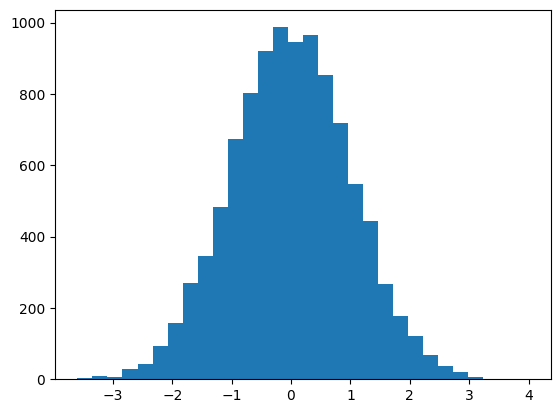

In [2]:
sample = normal(size = 10000) # generador
pyplot.hist(sample, bins = 30)
pyplot.show()

## Estimación paramétrica

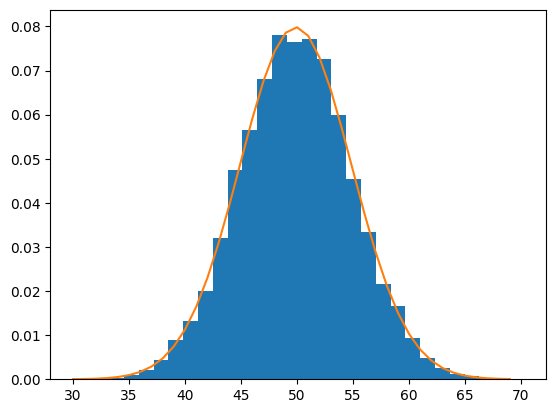

In [22]:
sample = normal(loc=50, scale=5, size=10000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilidades = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins = 30, density=True)
pyplot.plot(values, probabilidades)
pyplot.show()

# Estimación no paramétrica

La estimación no paramétrica implica no forzar parámetros a una distribución única, sino que se hará una combinación de varias distribuciones.
Cuando tenemos distribuciones como por ejemplo una distribucion bimodal, que no se ajusta a una distribución gausiana u otro tipo de distribución conocida, entonces combinamos varias funciones.

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


In [24]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

# Construimos una distribución bimodal artificial
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape(len(sample), 1)
model.fit(sample)

KernelDensity(bandwidth=2)

En el código que continua calculamos las probabilidades logaritmicas ya que es más comodo para la computadora trabajar en logaritmos para evitar un fenómeno llamado _underflow_.
A pesar de esto necesitamos tener las probabilidades normales, por lo que aplicamos la función contraria al logaritmo, que es la función exponencial.

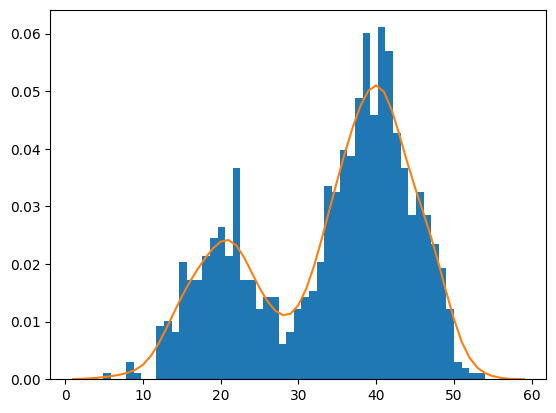

In [25]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logaritmica
probabilities = np.exp(probabilities) # inversion de probabilidad

pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()